## Анализ встроенного и собственноручно реализованного ГПСЧ  
### Реализация
Импортируем нужные модули и инициализируем генератор случайных чисел.

In [1]:
import sys
sys.path.append(r'C:\Users\Kell\PycharmProjects\ExpData')

import random
from pylab import frange

import grapher
import analysis as a
import prng

%matplotlib inline

p = prng.PRNG()

grapher.init()

Далее зададим длину массива случайных чисел, левую и правую границу возможных значений, и сгенерируем два массива:  
 * fake_random сгенерирован с помощью созданной мной функцией генерации псевдослучайных случайных чисел;
 * real_random сгенерирован с помощью встроенной функции генерации псевдослучайных чисел.

In [2]:
length = 5000
left = 0
right = 1

fake_random = [p.next(left=left, right=right) for i in range(0, length)]
real_random = [random.random() for j in range(0, length)]

### Статистика  
Посчитаем статистику для полученных массивов и сравним их.

In [3]:
print("Functions:\t\t{0}\t{1}".format("My realization",
                                      "Native Realization"))
print("Mean:\t\t\t{0}\t\t{1}".format(round(a.mean(fake_random), 7),
                                   round(a.mean(real_random), 7)))
print("Square mean:\t\t{0}\t\t{1}".format(round(a.square_mean(fake_random), 7),
                                        round(a.square_mean(real_random), 7)))
print("Root Mean Square:\t{0}\t\t{1}".format(round(a.root_mean_square(fake_random), 7),
                                             round(a.root_mean_square(real_random), 7)))
print("Variance:\t\t{0}\t\t{1}".format(round(a.variance(fake_random), 7),
                                       round(a.variance(real_random), 7)))
print("SQRT Variance:\t\t{0}\t\t{1}".format(round(a.sqrt_variance(fake_random), 7),
                                          round(a.sqrt_variance(real_random), 7)))
print("Skewness:\t\t{0}\t\t{1}".format(round(a.skewness(fake_random), 7),
                                       round(a.skewness(real_random), 7)))
print("Kurtosis:\t\t{0}\t\t{1}".format(round(a.kurtosis(fake_random), 7),
                                       round(a.kurtosis(real_random), 7)))

Functions:		My realization	Native Realization
Mean:		0.4988545		0.4915049
Square mean:	0.3318368		0.3235007
Root Mean Square:	0.5760527		0.5687712
Variance:		0.0829809		0.0819237
SQRT Variance:	0.2880641		0.2862232
Skewness:		-1.43e-05		0.0490764
Kurtosis:		1.7938959		1.8320199


Можно заметить, что многие показатели почти совпадают, что говорит о схожести распределения.  
  
Выведем плотность вероятности для каждой функции на промежутке от минимального значения до максимального.

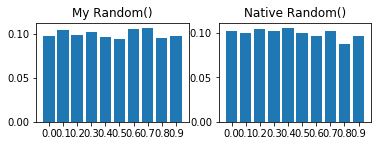

In [12]:
bar_count = 10
grapher.set_subplot(subplot_number=1, x_arr=range(0, bar_count),
                    xticks=[range(0, bar_count),
                            [str(i) for i in frange(left, right, (right - left) / bar_count)]],
                    y_arr=a.density(fake_random, bar_count), bar=True, title='My Random()')
grapher.set_subplot(subplot_number=2, x_arr=range(0, bar_count),
                    xticks=[range(0, bar_count),
                            [str(i) for i in frange(0, 1, 0.1)]],
                    y_arr=a.density(real_random, bar_count), bar=True, title='Native Random()')

Далее посчитаем автокорреляцию для каждой из функций и кросскорреляцию функций друг с другом.

In [13]:
ac_fake = [a.autocorrelation(fake_random, i) for i in range(0, len(fake_random) - 1)]
ac_real = [a.autocorrelation(real_random, i) for i in range(0, len(real_random) - 1)]
cca = [a.crosscorrelation(fake_random, real_random, i) for i in range(0, len(fake_random) - 1)]
ccb = [a.crosscorrelation(real_random, fake_random, i) for i in range(0, len(real_random) - 1)]

Выведем графики полученных значений автокорреляционой функции.

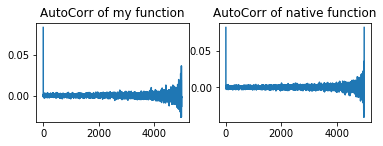

In [14]:
grapher.set_subplot(subplot_number=1, x_arr=range(0, len(fake_random) - 1), y_arr=ac_fake,
                    title='AutoCorr of my function')
grapher.set_subplot(subplot_number=2, x_arr=range(0, len(real_random) - 1), y_arr=ac_real,
                    title='AutoCorr of native function')

А также графики значений кросскорреляционных функций.

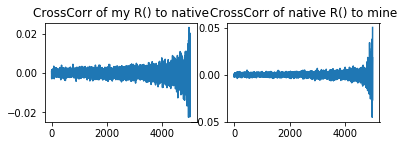

In [15]:
grapher.set_subplot(subplot_number=1, x_arr=range(0, len(fake_random) - 1), y_arr=cca,
                    title='CrossCorr of my R() to native')
grapher.set_subplot(subplot_number=2, x_arr=range(0, len(real_random) - 1), y_arr=ccb,
                    title='CrossCorr of native R() to mine')

Как можно заметить, корреляции найти не удалось, что говорит о достаточно качественной реализации функций.  
  
### Стационарность
Для проверки нашей реализации ГПСЧ на стационарность давайте возьмем длинную последовательность значений, разобьем ее на 10 одинаковых интервалов и полученные интервалы рассмотрим как ансамбль функций.  


In [16]:
length = 10000
fake_random = [p.next() for i in range(0, length)]

array_f = []
for i in range(0, 10):
	array_f.append(fake_random[int(i * length / 10):int((i + 1) * length / 10)])

Для определения стационарности процесса посчитаем стандартное отклонение множества средних значений и дисперсий для данного ансамбля. Будем считать, что процесс является стационарным при условии, что стандартное отклонение будет составлять не более 5% от максимального значения функции.

In [17]:

mean_arr = [a.mean(i) for i in array_f]
t = a.sqrt_variance(mean_arr)
print('Дисперсия средних по 10 замерам: {0},'
      ' относительно максимального результата функции: {1}%'.format(t, round(t * 100 / right, 2)))
stationarity = False if round(t * 100 / right) > 5 else True

variance_arr = [a.variance(i) for i in array_f]
t = a.sqrt_variance(variance_arr)
print('Дисперсия дисперсий по 10 замерам: {0},'
      ' относительно максимального результата функции: {1}%'.format(t, round(t * 100 / right, 2)))
stationarity = False if round(t * 100 / right) > 5 else stationarity

print('Процесс стационарен: ' + str(stationarity))

Дисперсия средних по 10 замерам: 0.007197529181855446, относительно максимального результата функции: 0.72%
Дисперсия дисперсий по 10 замерам: 0.0020559482816344594, относительно максимального результата функции: 0.21%
Процесс стационарен: True


### Заключение  
В рамках данной работы были проанализированы собственная реализация ГПСЧ и встроенная в стандартную библиотеку языка Python 3. Были построены графики их авто- и кросс-корреляций и сделан вывод о стационарности процесса.